In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns 
from sklearn import datasets
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('C:/Users/radwa/OneDrive/Desktop/SparksTasks/Task_3/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [4]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:>

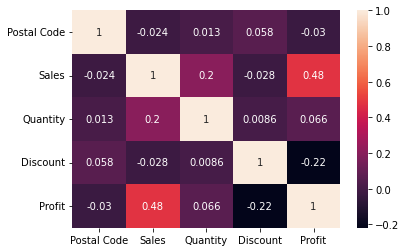

In [13]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,annot=True)

In [19]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

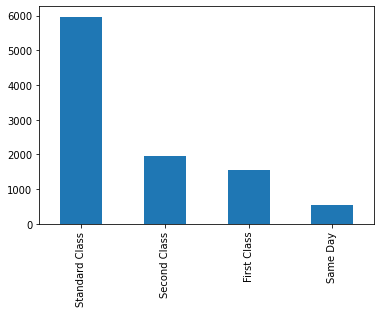

In [20]:
M=(df['Ship Mode'].value_counts().plot(kind='bar'))

In [8]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

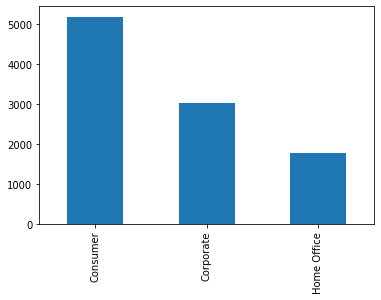

In [12]:
gph=(df['Segment'].value_counts().plot(kind='bar'))

In [14]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

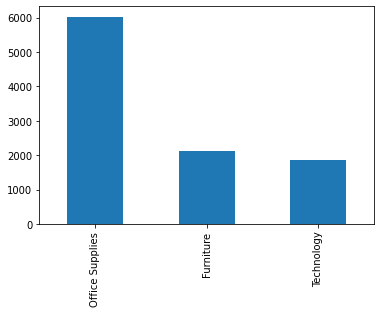

In [16]:
C=(df['Category'].value_counts().plot(kind='bar'))

In [17]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:>

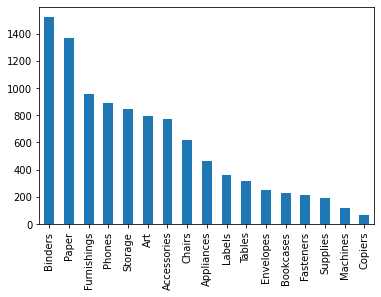

In [18]:
((df['Sub-Category'].value_counts())).plot(kind='bar')

In [24]:
df.pivot_table(values='Sales', index='Segment', columns='Discount', aggfunc="mean")

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,216.382406,615.990960,507.862690,205.706672,478.453447,637.16000,636.350437,493.815667,478.067973,44.859730,106.171300,62.437820
Corporate,251.477029,559.219333,572.650464,198.586339,417.371945,490.49148,541.891865,555.868500,779.520882,48.889128,71.753022,56.318598
Home Office,215.971044,498.287118,534.821889,239.180046,427.883575,326.36600,423.004000,427.237250,2331.514167,56.736160,118.323986,35.585261


In [25]:
df.pivot_table(values='Profit', index='Segment', columns='Discount', aggfunc="mean")

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,64.161707,93.630090,15.744638,22.426571,-48.018291,-102.708631,-93.462041,-216.651900,-253.572181,-38.639822,-106.962433,-115.213404
Corporate,71.584290,99.802956,49.282143,23.157672,-46.241380,-82.702010,-132.003562,-280.968633,-388.164788,-40.623326,-68.023771,-96.815833
Home Office,66.961384,97.234865,30.271889,34.734830,-37.189678,-57.226350,-119.900858,-175.146900,-377.121333,-60.039948,-115.479956,-62.509202
